# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

The 'Who' referes to the audience you are communicating with. The 'What' refers to the the material and concepts you want your audience to know. The 'How' refers to the mechanism you use to relay your 'What' to your audience. For example, the 'Who' for my data could be the investors in my pharmaceutical company, the 'What' could be the new data I found to support its beneficial properties in the treatment of Cancer, and the 'How' could be using either a slideshow presentation to portray my results or a Slideument which would have both a slide-show presentation in addition to a dense document with more information. 

# 3. Homework - work with your own data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [2]:
# Cardiovascular Health Dataset info and describe
import pandas as pd 
df = pd.read_csv('devices.csv')
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118249 entries, 0 to 118248
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    118249 non-null  int64 
 1   classification        35601 non-null   object
 2   code                  36218 non-null   object
 3   description           89606 non-null   object
 4   distributed_to        33626 non-null   object
 5   implanted             34898 non-null   object
 6   name                  118218 non-null  object
 7   number                63800 non-null   object
 8   quantity_in_commerce  31929 non-null   object
 9   risk_class            32948 non-null   object
 10  slug                  118249 non-null  object
 11  country               118248 non-null  object
 12  manufacturer_id       118249 non-null  int64 
 13  created_at            118249 non-null  object
 14  updated_at            118249 non-null  object
dtypes: int64(2), obje

In [3]:
#check for duplicates and remove duplicates
duplicated_rows = df.duplicated()
duplicates = df[df.duplicated()]
duplicates_removed = df.drop_duplicates()

In [4]:
# mean median and mode of data set 

column_means_numeric= df.select_dtypes(include='number').mean()
print(column_means_numeric)
column_medians_numeric = df.select_dtypes(include='number').median()
print(column_medians_numeric)
column_mode_numeric = df.select_dtypes(include='number').mode()
print(column_mode_numeric)

id                 59125.000000
manufacturer_id    15022.948321
dtype: float64
id                 59125.0
manufacturer_id    14880.0
dtype: float64
            id  manufacturer_id
0            1           7418.0
1            2              NaN
2            3              NaN
3            4              NaN
4            5              NaN
...        ...              ...
118244  118245              NaN
118245  118246              NaN
118246  118247              NaN
118247  118248              NaN
118248  118249              NaN

[118249 rows x 2 columns]


In [5]:
# missing or null values 
missing_values = df.isna()
#print(missing_values)
# True represents a missing value 
missing_values_dropped = df.dropna()
print(missing_values_dropped)

            id                             classification code  \
12529    12530  General Hospital and Personal Use Devices  LBI   
12530    12531  General Hospital and Personal Use Devices  FPA   
12531    12532  General Hospital and Personal Use Devices  FPA   
12532    12533  General Hospital and Personal Use Devices  FPA   
12533    12534  General Hospital and Personal Use Devices  FPA   
...        ...                                        ...  ...   
104291  104292           Hematology and Pathology Devices  GKZ   
104292  104293                     Cardiovascular Devices  LPA   
104293  104294        General and Plastic Surgery Devices  KQM   
104294  104295                     Anesthesiology Devices  CBK   
104295  104296                     Anesthesiology Devices  CBK   

                                              description  \
12529   Replacement LED PCB Kit, part number 001840, o...   
12530   ACCU-CHEK Tender II 13/80 10 + 10 pieces || Pr...   
12531   ACCU-CHEK Tender

In [6]:
#one-hot encoding of country where device was developed 
df_encoded_country = pd.get_dummies(df, columns=['country'], drop_first=True)
df_encoded_country


,id,classification,code,description,distributed_to,implanted,name,number,quantity_in_commerce,risk_class,...,country_RUS,country_SAU,country_SGP,country_SLV,country_SRB,country_SVN,country_SWE,country_TUN,country_TUR,country_USA
0,1,NaN,NaN,IVD Other,NaN,NaN,Cell-Dyn Emerald Cleanser,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,True,False
1,2,NaN,NaN,Class IIB,NaN,NaN,"TECNIS Monofocal 1-piece, TECNIS 1-Piece IOL w...",NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,True,False
2,3,NaN,NaN,Class IIA,NaN,NaN,Centurion FMS Package for Centurion Vision System,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,True,False
3,4,NaN,NaN,Class IIB,NaN,NaN,Focusforce intraocular foldable lenses,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,True,False
4,5,NaN,NaN,IVD Other,NaN,NaN,Cholesterol HDL Direct,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118244,118245,NaN,NaN,NaN,NaN,NaN,Cochlear Nucleus CI500 cochlear implant range,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
118245,118246,NaN,NaN,NaN,NaN,NaN,DePuy Spine Confidence Introducer Needles,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
118246,118247,NaN,NaN,NaN,NaN,NaN,VICRYL RAPIDE SUTURES,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
118247,118248,NaN,NaN,NaN,NaN,NaN,Model 990018 Multi-Channel RF Ablation GENius ...,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


# Conclusions

This dataset is definitely usable in the context of determining which medical devices are successful in their field and which are unsuccessful. This dataset has some faults including quite a lot of missing data which could be due to different companies collecting different data markers for their product. For example, the 'distributed_to' and 'implanted' columns are almost entirely empty.The dataset 'description' column should be broken down through one-hot encoding into different columns to help clean it. As it is right now it is bulky and hard to encript and organize. With one-hot encoding, this column would be separated into separate columns to organize the data by the usage and descriptor of each medical device. This would make the data much more clean and easier to categorize. 


# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

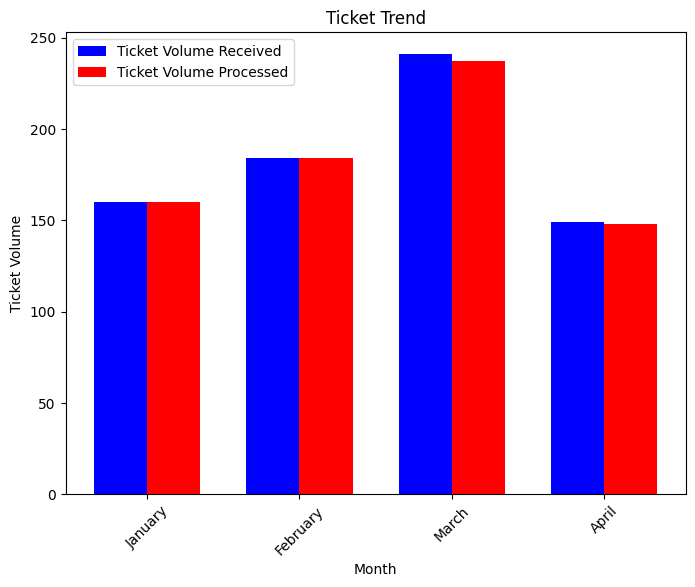

In [7]:
# Bar Chart for Ticket Trend 
import matplotlib.pyplot as plt
categories = ['January', 'February', 'March', 'April']
ticket_volume_received = [160,184,241,149]
ticket_volume_processed = [160,184,237,148]
n = len(categories)
X = np.arange(n)
width=0.35
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(X-width/2, ticket_volume_received, width, label='Ticket Volume Received', color='blue')
ax.bar(X+width/2, ticket_volume_processed, width, label='Ticket Volume Processed', color='red')

ax.set_title('Ticket Trend')
ax.set_xlabel('Month')
ax.set_ylabel('Ticket Volume')
combined_labels = [f'{cat}' for cat in categories]
ax.set_xticks(X)
ax.set_xticklabels(combined_labels)
plt.xticks(rotation=45)
ax.legend()
